# Logistic Regression(3)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

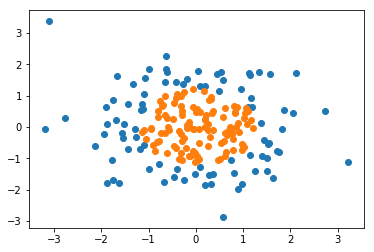

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 1. 使用逻辑回归

In [5]:
from LogisticReg.LogisticRegression import LogisticRegression

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [7]:
log_reg.score(X, y)

0.605

### 2. 使用多项式 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [12]:
poly_log_reg.score(X, y)

0.95

### 3. 使用正则化(scikit-learn)

**scikit-learn中使用的正则化方式：**
$$C \cdot J(\theta) + L_1$$
$$C \cdot J(\theta) + L_2$$

In [13]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:,1] < 1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

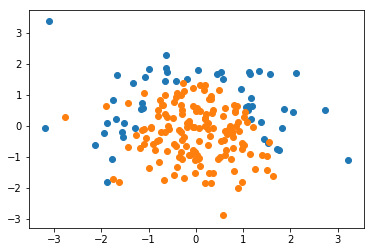

In [14]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [22]:
log_reg.score(X_test, y_test)

0.86

#### scikit-learn中多项式逻辑回归

In [31]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='lbfgs'))
    ])

In [32]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [33]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [34]:
poly_log_reg.score(X_test, y_test)

0.94

In [38]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [39]:
poly_log_reg2.score(X_train, y_train)

0.94

In [40]:
poly_log_reg2.score(X_test, y_test)

0.92

- 当 degree = 20 时，训练集分数提高，但是预测数据集分数下降，说明你模型泛化能力下降
- 即模型发生了过拟合

#### 加入超参数 C 对模型正则化

In [41]:
# C: 分类准确度，损失函数前面的系数
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver='lbfgs', C=C))
    ])

In [43]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)

In [44]:
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [45]:
poly_log_reg3.score(X_train, y_train)

0.84

In [46]:
poly_log_reg3.score(X_test, y_test)

0.92